In [109]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import scale

from statsmodels.tsa.arima_model import ARIMA

import sys
pd.set_option('display.max_columns', None) 

In [48]:
file_path = "./Economic_data_clean_20200801.xlsx"
csv_data = pd.read_excel(file_path)
csv_data.describe()

,10YR_UST,10_2_Curve,10_30_Curve,10_5_Curve,1YR_SWAP,2YR_UST,30YR_UST,5YR_UST,CDX_HY,CDX_HY_10D_AVG,CDX_HY_30D_AVG,CDX_HY_5D_AVG,CDX_HY_SPREAD,CDX_IG,CDX_IG_10D_AVG,CDX_IG_30D_AVG,CDX_IG_5D_AVG,CITI_SUPRISE,EARN_DOWN,EARN_UP,FED_BS,GOLD,LF98TRUU_Index_ SPREAD_RATE_RATIO,LF98TRUU_Index_DURATION,LF98TRUU_Index_OAS,LF98TRUU_Index_SPREAD_DUR_RATIO,LF98TRUU_Index_YTW,LF98TRUU_RATE_COMP,LUACTRUU_Index_ SPREAD_RATE_RATIO,LUACTRUU_Index_DURATION,LUACTRUU_Index_OAS,LUACTRUU_Index_SPREAD_DUR_RATIO,LUACTRUU_Index_YTW,LUACTRUU_RATE_COMP,OIL,S&P500,UNEMPLOY_NUM,VIX_INDEX
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1986.000000,1966.000000,1991.000000,1995.000000,1995.000000,1986.000000,1966.000000,1991.000000,1995.000000,1995.000000,1995.000000,1978.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1993.000000,1995.000000
mean,2.183229,1.111956,0.679144,0.565337,0.861810,1.071273,2.862373,1.617892,105.108012,105.130431,105.186190,105.117575,381.205606,70.477524,70.405937,70.247115,70.445707,1.942206,4.795990,3.078195,22.501921,1336.509424,2.994710,3.965109,4.491359,1.131483,6.308789,1.817480,0.792102,7.360329,1.299245,0.176877,3.213142,1.913934,64.335168,2276.900922,394.226292,16.186787
std,0.551212,0.712159,0.285944,0.355250,0.811932,0.800430,0.537470,0.630994,3.269842,3.189494,3.024438,3.231683,77.332033,14.864370,14.458275,13.706382,14.667187,44.697745,6.196141,4.709612,3.054571,172.972856,2.124642,0.339324,1.130641,0.254583,0.957803,0.589548,0.533941,0.358923,0.291408,0.039450,0.443936,0.528925,22.649950,499.091652,683.078472,7.059103
min,0.528000,-0.051000,0.101000,0.064000,0.011000,0.105000,0.995000,0.204000,86.724000,91.938700,93.369600,89.421400,274.642000,43.750000,44.565700,45.385767,44.203600,-144.600000,0.000000,0.000000,17.500000,1051.100000,0.937992,2.961155,3.033862,0.800238,4.829749,0.523303,0.314756,6.718602,0.847845,0.112858,1.861472,0.580007,-37.630000,1353.330000,201.000000,9.140000
25%,1.823000,0.471000,0.483000,0.228000,0.146000,0.386000,2.629000,1.300500,103.596500,103.728975,103.842600,103.640500,330.319500,60.522500,60.741025,60.614658,60.693200,-23.450000,1.000000,0.000000,19.600000,1225.900000,1.830202,3.855317,3.641253,0.937436,5.670435,1.527313,0.511738,7.133888,1.105355,0.149092,2.911151,1.602981,48.190000,1927.495000,230.000000,12.650000
50%,2.245000,1.049000,0.691000,0.499000,0.484500,0.746000,2.938000,1.609000,106.360000,106.383250,106.433133,106.359400,351.100000,66.890000,66.723250,66.442883,66.766600,-3.100000,3.000000,1.000000,23.100000,1287.950000,2.381841,4.049192,4.210788,1.082005,6.143635,1.777146,0.642787,7.286490,1.252249,0.170116,3.152942,1.908458,57.110000,2139.180000,265.000000,14.240000
75%,2.592000,1.598000,0.829000,0.807500,1.476300,1.592500,3.129500,1.889000,107.269500,107.240100,107.239692,107.251600,414.961000,78.812500,79.044825,79.162592,78.759000,27.100000,6.000000,4.000000,24.400000,1376.430000,3.459103,4.208067,5.004586,1.239395,6.604829,2.043521,0.909142,7.510812,1.411795,0.198393,3.434513,2.134256,88.715000,2724.225000,317.000000,17.010000
max,3.237000,2.648000,1.253000,1.426000,2.638000,2.965000,3.968000,3.092000,109.873000,109.669400,109.450367,109.751800,871.112000,151.798000,127.538200,112.173300,136.412800,270.800000,43.000000,34.000000,33.400000,1975.860000,17.135690,4.514925,10.999885,2.543208,11.687243,3.234423,4.833899,8.799207,3.731185,0.495537,4.576570,3.177737,110.530000,3386.150000,6867.000000,82.690000


In [49]:
csv_data['EARN_DOWN'] = csv_data['EARN_DOWN'].astype(np.float16)
csv_data['EARN_UP'] = csv_data['EARN_UP'].astype(np.float16)
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 39 columns):
Dates                                1995 non-null datetime64[ns]
10YR_UST                             1995 non-null float64
10_2_Curve                           1995 non-null float64
10_30_Curve                          1995 non-null float64
10_5_Curve                           1995 non-null float64
1YR_SWAP                             1995 non-null float64
2YR_UST                              1995 non-null float64
30YR_UST                             1995 non-null float64
5YR_UST                              1995 non-null float64
CDX_HY                               1995 non-null float64
CDX_HY_10D_AVG                       1986 non-null float64
CDX_HY_30D_AVG                       1966 non-null float64
CDX_HY_5D_AVG                        1991 non-null float64
CDX_HY_SPREAD                        1995 non-null float64
CDX_IG                               1995 non-null float64
C

In [50]:
lags = [10, 30]
cols_to_lag = ['CDX_HY', 'CDX_IG']

def create_lag_variables(df, lags, cols):
    df = df.assign(**{
        '{} (t-{})'.format(col, t): csv_data[col].shift(t)
        for t in lags
        for col in cols_to_lag
    })
    return df
create_lag_variables(csv_data, lags, cols_to_lag)

,Dates,10YR_UST,10_2_Curve,10_30_Curve,10_5_Curve,1YR_SWAP,2YR_UST,30YR_UST,5YR_UST,CDX_HY,CDX_HY_10D_AVG,CDX_HY_30D_AVG,CDX_HY_5D_AVG,CDX_HY_SPREAD,CDX_IG,CDX_IG_10D_AVG,CDX_IG_30D_AVG,CDX_IG_5D_AVG,CITI_SUPRISE,EARN_DOWN,EARN_UP,FED_BS,GOLD,LF98TRUU_Index_ SPREAD_RATE_RATIO,LF98TRUU_Index_DURATION,LF98TRUU_Index_OAS,LF98TRUU_Index_SPREAD_DUR_RATIO,LF98TRUU_Index_YTW,LF98TRUU_RATE_COMP,LUACTRUU_Index_ SPREAD_RATE_RATIO,LUACTRUU_Index_DURATION,LUACTRUU_Index_OAS,LUACTRUU_Index_SPREAD_DUR_RATIO,LUACTRUU_Index_YTW,LUACTRUU_RATE_COMP,OIL,S&P500,UNEMPLOY_NUM,VIX_INDEX,CDX_HY (t-10),CDX_IG (t-10),CDX_HY (t-30),CDX_IG (t-30)
0,2012-08-08,1.649,1.377,1.101,0.923,0.1455,0.272,2.750,0.726,98.063,NaN,NaN,NaN,548.072,102.750,NaN,NaN,NaN,-33.5,20.0,10.0,NaN,1612.55,5.367730,3.984576,5.650459,1.418083,6.703131,1.052672,1.367675,7.169384,1.741897,0.242963,3.015516,1.273619,93.35,1402.22,NaN,15.32,NaN,NaN,NaN,NaN
1,2012-08-09,1.688,1.416,1.067,0.959,0.1450,0.272,2.755,0.729,97.938,NaN,NaN,NaN,551.268,103.000,NaN,NaN,NaN,-21.3,7.0,8.0,NaN,1617.18,5.299545,3.999300,5.684621,1.421404,6.757283,1.072662,1.357236,7.172471,1.735917,0.242025,3.014926,1.279009,93.36,1402.80,NaN,15.28,NaN,NaN,NaN,NaN
2,2012-08-10,1.657,1.396,1.094,0.950,0.1450,0.261,2.751,0.707,97.875,NaN,NaN,NaN,552.893,102.751,NaN,NaN,NaN,-20.9,0.0,0.0,NaN,1620.15,5.310995,4.016590,5.766232,1.435604,6.851948,1.085716,1.390026,7.185671,1.739531,0.242083,2.990969,1.251438,92.87,1405.87,369.0,14.74,NaN,NaN,NaN,NaN
3,2012-08-13,1.664,1.399,1.088,0.957,0.1420,0.265,2.752,0.707,97.813,NaN,NaN,NaN,554.523,102.750,NaN,NaN,NaN,-19.7,2.0,2.0,NaN,1609.75,5.478811,4.011154,5.758422,1.435602,6.809457,1.051035,1.376335,7.178373,1.727228,0.240616,2.982175,1.254947,92.73,1404.11,369.0,13.70,NaN,NaN,NaN,NaN
4,2012-08-14,1.738,1.463,1.097,0.987,0.1440,0.275,2.835,0.751,97.844,NaN,NaN,97.9066,553.750,103.000,NaN,NaN,102.8502,-12.1,6.0,2.0,NaN,1599.05,5.390991,4.036393,5.702170,1.412689,6.759892,1.057722,1.320163,7.148033,1.723379,0.241098,3.028808,1.305429,93.43,1403.93,369.0,14.85,NaN,NaN,NaN,NaN
5,2012-08-15,1.815,1.530,1.105,1.014,0.1470,0.285,2.920,0.801,97.672,NaN,NaN,97.8284,558.182,103.152,NaN,NaN,102.9306,-19.1,4.0,1.0,NaN,1603.10,4.949325,4.047262,5.690615,1.406041,6.840391,1.149776,1.271502,7.106049,1.727685,0.243129,3.086460,1.358775,94.33,1405.53,369.0,14.63,NaN,NaN,NaN,NaN
6,2012-08-16,1.835,1.543,1.118,1.017,0.1460,0.292,2.953,0.818,98.126,NaN,NaN,97.8660,546.616,101.125,NaN,NaN,102.5556,-19.7,11.0,1.0,NaN,1615.13,4.828255,4.073220,5.694207,1.397962,6.873558,1.179351,1.248555,7.088914,1.726574,0.243560,3.109432,1.382858,95.60,1415.51,369.0,14.29,NaN,NaN,NaN,NaN
7,2012-08-17,1.810,1.524,1.121,1.015,0.1460,0.286,2.931,0.795,98.375,NaN,NaN,97.9660,540.682,99.750,NaN,NaN,101.9554,-18.1,2.0,0.0,NaN,1616.40,4.773268,4.074416,5.688284,1.396098,6.879980,1.191696,1.249889,7.097504,1.714747,0.241599,3.086666,1.371919,96.01,1418.16,376.0,13.45,NaN,NaN,NaN,NaN
8,2012-08-20,1.805,1.523,1.114,1.018,0.1460,0.282,2.919,0.787,98.625,NaN,NaN,98.1284,534.009,98.500,NaN,NaN,101.1054,-16.1,3.0,1.0,NaN,1620.50,4.992875,4.062871,5.678596,1.397681,6.815936,1.137340,1.255812,7.099477,1.713670,0.241380,3.078261,1.364591,95.97,1418.13,376.0,14.02,NaN,NaN,NaN,NaN
9,2012-08-21,1.798,1.511,1.102,1.010,0.1490,0.287,2.900,0.788,98.500,98.0831,NaN,98.2596,537.531,98.625,101.5403,NaN,100.2304,-15.3,3.0,2.0,NaN,1637.80,5.071027,4.054286,5.649930,1.393570,6.764089,1.114159,1.254458,7.108405,1.705204,0.239886,3.064519,1.359315,96.40,1413.17,376.0,15.02,NaN,NaN,NaN,NaN


In [51]:
csv_data['CDX_HY_momentum'] = csv_data['CDX_HY_10D_AVG'] - csv_data['CDX_HY_30D_AVG'] / csv_data['CDX_HY_30D_AVG']
csv_data['CDX_IG_momentum'] = csv_data['CDX_IG_10D_AVG'] - csv_data['CDX_IG_30D_AVG'] / csv_data['CDX_IG_30D_AVG']

In [52]:
csv_data['CDX_HY_UpNextDay'] = csv_data['CDX_HY'].shift(-1) > csv_data['CDX_HY']
csv_data['CDX_IG_UpNextDay'] = csv_data['CDX_IG'].shift(-1) > csv_data['CDX_IG']

In [55]:
complete_data = csv_data.dropna()

In [57]:
X = complete_data.drop(['Dates','CDX_HY_UpNextDay','CDX_IG_UpNextDay'],axis=1)
Y_HY = complete_data['CDX_HY_UpNextDay']
Y_IG = complete_data['CDX_IG_UpNextDay']

In [85]:
X_HY_train, X_HY_test, Y_HY_train, Y_HY_test = train_test_split(X, Y_HY, test_size=.25)
X_IG_train, X_IG_test, Y_IG_train, Y_IG_test = train_test_split(X, Y_IG, test_size=.25)
AB_model_HY = AdaBoostClassifier().fit(X_HY_train, Y_HY_train)
AB_model_IG = AdaBoostClassifier().fit(X_IG_train, Y_IG_train)

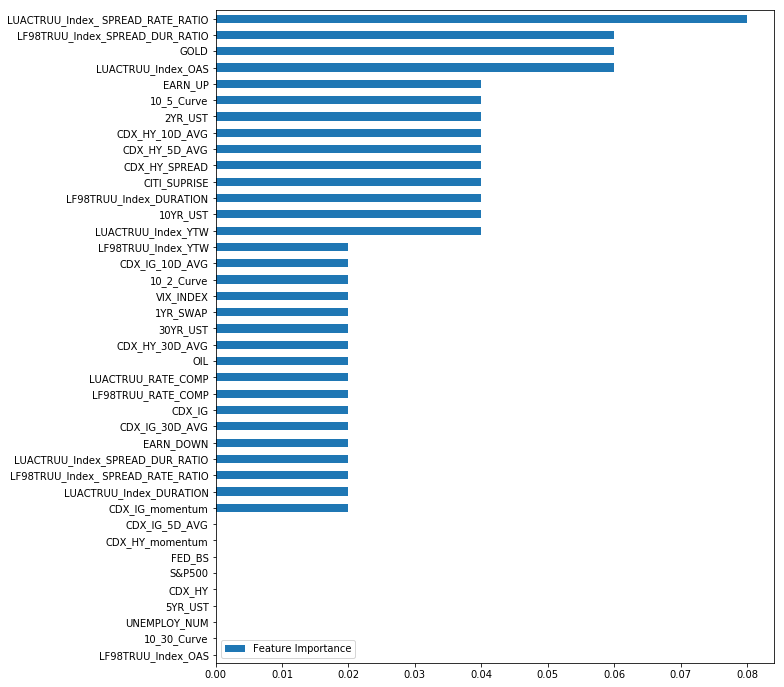

In [86]:
feat_impt = pd.DataFrame(
    AB_model_HY.feature_importances_, columns=['Feature Importance'], index=X_HY_train.columns)
feat_impt = feat_impt.sort_values('Feature Importance', ascending=True)
feat_impt.plot(kind='barh', figsize=(10, 12))

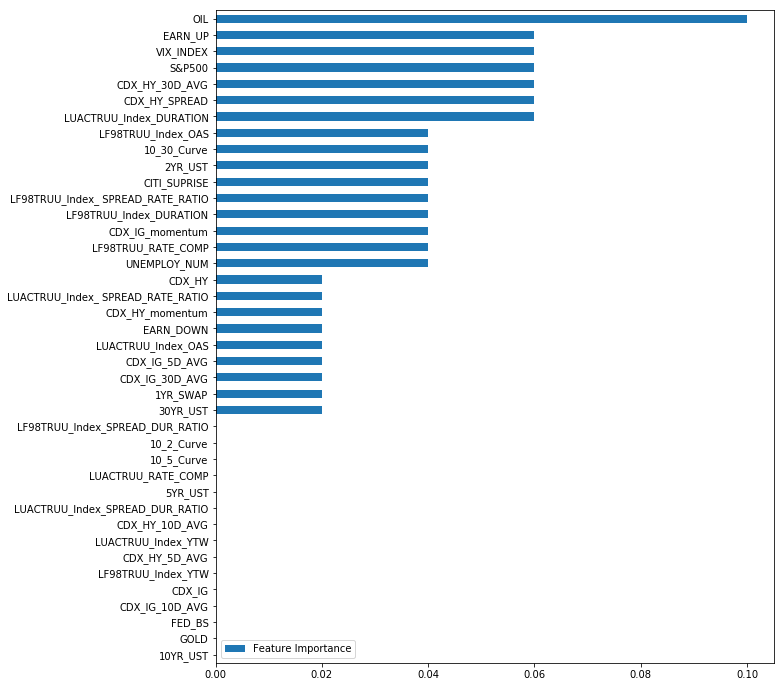

In [87]:
feat_impt = pd.DataFrame(
    AB_model_IG.feature_importances_, columns=['Feature Importance'], index=X_IG_train.columns)
feat_impt = feat_impt.sort_values('Feature Importance', ascending=True)
feat_impt.plot(kind='barh', figsize=(10, 12))

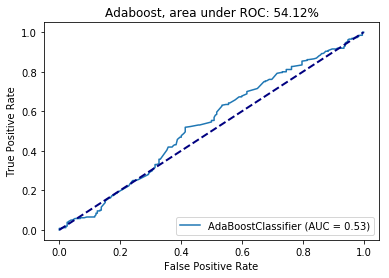

In [84]:
Y_HY_pred = AB_model.predict(X_HY_test)
plot_roc_curve(AB_model, X_HY_test, Y_HY_test)
area_roc = roc_auc_score(Y_HY_test, Y_HY_pred)
plt.title("{}, area under ROC: {:.2%}".format('Adaboost', area_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

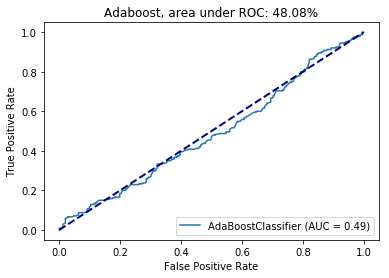

In [88]:
Y_IG_pred = AB_model_IG.predict(X_IG_test)
plot_roc_curve(AB_model_IG, X_IG_test, Y_IG_test)
area_roc = roc_auc_score(Y_IG_test, Y_IG_pred)
plt.title("{}, area under ROC: {:.2%}".format('Adaboost', area_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

In [90]:
csv_data.columns

Index(['Dates', '10YR_UST', '10_2_Curve', '10_30_Curve', '10_5_Curve',
       '1YR_SWAP', '2YR_UST', '30YR_UST', '5YR_UST', 'CDX_HY',
       'CDX_HY_10D_AVG', 'CDX_HY_30D_AVG', 'CDX_HY_5D_AVG', 'CDX_HY_SPREAD',
       'CDX_IG', 'CDX_IG_10D_AVG', 'CDX_IG_30D_AVG', 'CDX_IG_5D_AVG',
       'CITI_SUPRISE', 'EARN_DOWN', 'EARN_UP', 'FED_BS', 'GOLD',
       'LF98TRUU_Index_ SPREAD_RATE_RATIO', 'LF98TRUU_Index_DURATION',
       'LF98TRUU_Index_OAS', 'LF98TRUU_Index_SPREAD_DUR_RATIO',
       'LF98TRUU_Index_YTW', 'LF98TRUU_RATE_COMP',
       'LUACTRUU_Index_ SPREAD_RATE_RATIO', 'LUACTRUU_Index_DURATION',
       'LUACTRUU_Index_OAS', 'LUACTRUU_Index_SPREAD_DUR_RATIO',
       'LUACTRUU_Index_YTW', 'LUACTRUU_RATE_COMP', 'OIL', 'S&P500',
       'UNEMPLOY_NUM', 'VIX_INDEX', 'CDX_HY_momentum', 'CDX_IG_momentum',
       'CDX_HY_UpNextDay', 'CDX_IG_UpNextDay'],
      dtype='object')

In [97]:
csv_data.set_index('Dates')['CDX_IG']

Dates
2012-08-08    102.750
2012-08-09    103.000
2012-08-10    102.751
2012-08-13    102.750
2012-08-14    103.000
2012-08-15    103.152
2012-08-16    101.125
2012-08-17     99.750
2012-08-20     98.500
2012-08-21     98.625
2012-08-22     99.375
2012-08-23    101.625
2012-08-24    100.750
2012-08-27    100.250
2012-08-28    101.000
2012-08-29    100.876
2012-08-30    103.000
2012-08-31    101.813
2012-09-04    101.000
2012-09-05    100.500
2012-09-06     95.191
2012-09-07     93.000
2012-09-10     95.438
2012-09-11     93.344
2012-09-12     90.906
2012-09-13     85.625
2012-09-14     83.000
2012-09-17     85.333
2012-09-18     85.376
2012-09-19     85.500
               ...   
2020-06-19     78.551
2020-06-22     76.130
2020-06-23     74.946
2020-06-24     78.508
2020-06-25     78.226
2020-06-26     80.886
2020-06-29     78.949
2020-06-30     75.879
2020-07-01     74.928
2020-07-02     74.131
2020-07-06     71.498
2020-07-07     74.400
2020-07-08     72.448
2020-07-09     74.989
2020

/Users/clement/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/clement/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/clement/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/clement/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

/Users/clement/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/clement/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/clement/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/clement/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

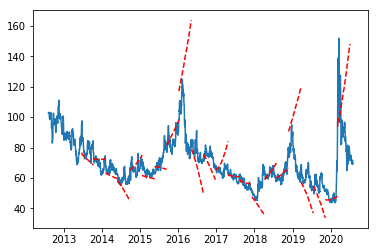

In [140]:
data = csv_data.set_index('Dates')['CDX_IG']
plt.plot(data.index, data)
for i in range(0, data.shape[0]-240, 80):
    subdata = data.iloc[i:i+240]
    model = ARIMA(data.iloc[i:i+240], order=(5,2,1))
    model_fit = model.fit(transparams=False)
    plt.plot(subdata.index[-80:] + pd.to_timedelta(80, unit='D'), model_fit.forecast(steps=80)[0], '--', color='red')
plt.show()

In [127]:
data.index[-20:] + pd.to_timedelta(20, unit='D')

DatetimeIndex(['2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06', '2020-08-09', '2020-08-10',
               '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-16',
               '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20'],
              dtype='datetime64[ns]', name='Dates', freq=None)

In [ ]:
import matplotlib.pyplot as plt


x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(x, np.sin(x), '--', linewidth=2,
                 label='Dashes set retroactively')
line1.set_dashes(dashes)

line2, = ax.plot(x, -1 * np.sin(x), dashes=[30, 5, 10, 5],
                 label='Dashes set proactively')

ax.legend(loc='lower right')

In [ ]:
def wavg(group):
    group = group.reset_index().drop(['index'], axis=1)
    i = 0
    weight_sum = 0
    for j in range(0, group.shape[0]):
        i = i + 1
        weight_sum = weight_sum + i
#         print(group.iloc[[j]] * i)
        group.iloc[[j]] = group.iloc[[j]] * i
#     print(group)
    return group.iloc[:, :].sum(axis=0) / weight_sum

In [ ]:
def DataPreprocess(raw_data, back_rows, forward_rows, is_weighted):
    raw_data = raw_data.drop(['Dates'], axis=1)
    start_index = back_rows
    end_index = raw_data.shape[0] - forward_rows + 1
    new_rows = []
    for i in range(start_index, end_index):
        if is_weighted:
            new_rows.append(wavg(raw_data.iloc[i-back_rows:i, :]))
        else:
            new_rows.append(raw_data.iloc[i-back_rows:i, :].mean(axis=0))
    training_data = pd.concat(new_rows, axis=1).T
    HY_labels = raw_data.iloc[start_index + forward_rows - 1: raw_data.shape[0], [5]].reset_index().drop(['index'], axis=1)
    IG_labels = raw_data.iloc[start_index + forward_rows - 1: raw_data.shape[0], [7]].reset_index().drop(['index'], axis=1)
    HY_spread_labels = raw_data.iloc[start_index + forward_rows - 1: raw_data.shape[0], [6]].reset_index().drop(['index'], axis=1)
    return training_data, HY_labels, IG_labels, HY_spread_labels

In [ ]:
training_data, HY_labels, IG_labels, HY_spread_labels = DataPreprocess(complete_data, 2, 2, True)
print(training_data.shape)
training_data.head()

(1973, 26)


,10YR_UST,1YR_SWAP,2YR_UST,30YR_UST,5YR_UST,CDX_HY,CDX_HY_SPREAD,CDX_IG,CITI_SUPRISE,EARN_DOWN,...,LF98TRUU_RATE_COMP,LUACTRUU_Index_ SPREAD_RATE_RATIO,LUACTRUU_Index_DURATION,LUACTRUU_Index_OAS,LUACTRUU_Index_SPREAD_DUR_RATIO,LUACTRUU_Index_YTW,LUACTRUU_RATE_COMP,OIL,UNEMPLOY_NUM,VIX_INDEX
0,1.564000,0.119500,0.226667,2.678667,0.606000,98.344000,541.452000,101.271000,-3.000000,2.000000,...,0.970255,1.451295,7.200773,1.716990,0.238446,2.900151,1.183161,95.690000,371.000000,17.810000
1,1.588000,0.121667,0.232667,2.698667,0.619333,98.354333,541.181333,100.666667,-2.266667,2.333333,...,0.939959,1.438422,7.199197,1.718522,0.238710,2.913255,1.194733,95.340000,371.000000,17.820000
2,1.650667,0.127000,0.250000,2.768333,0.659333,99.114667,522.085667,96.960667,3.000000,5.333333,...,0.993059,1.380087,7.173290,1.707882,0.238088,2.946245,1.238363,95.473333,371.000000,16.313333
3,1.671333,0.128333,0.252667,2.816333,0.655333,99.875333,503.095667,93.730333,11.833333,3.000000,...,1.011359,1.346670,7.163579,1.682525,0.234872,2.931903,1.249378,96.123333,385.666667,14.786667
4,1.658667,0.127333,0.247333,2.812333,0.640000,99.938333,501.530000,94.625333,17.333333,1.000000,...,1.004099,1.327376,7.156802,1.665194,0.232672,2.919758,1.254564,96.500000,393.000000,15.646667


In [ ]:
print(HY_labels.shape)
HY_labels.head()

(1973, 1)


,CDX_HY
0,99.500
1,100.063
2,99.876
3,100.250
4,100.657


In [ ]:
print(IG_labels.shape)
IG_labels.head()

(1973, 1)


,CDX_IG
0,95.191
1,93.000
2,95.438
3,93.344
4,90.906


In [ ]:
print(HY_spread_labels.shape)
HY_spread_labels.head()

(1973, 1)


,CDX_HY_SPREAD
0,512.403
1,498.442
2,503.074
3,493.820
4,483.802


In [ ]:

X_scaled = pd.DataFrame(scale(training_data, axis=0, with_mean=True, with_std=True, copy=True), columns=training_data.columns.values)
X_scaled.head()

,10YR_UST,1YR_SWAP,2YR_UST,30YR_UST,5YR_UST,CDX_HY,CDX_HY_SPREAD,CDX_IG,CITI_SUPRISE,EARN_DOWN,...,LF98TRUU_RATE_COMP,LUACTRUU_Index_ SPREAD_RATE_RATIO,LUACTRUU_Index_DURATION,LUACTRUU_Index_OAS,LUACTRUU_Index_SPREAD_DUR_RATIO,LUACTRUU_Index_YTW,LUACTRUU_RATE_COMP,OIL,UNEMPLOY_NUM,VIX_INDEX
0,-1.147512,-0.923955,-1.067753,-0.351494,-1.636934,-2.129921,2.134373,2.127650,-0.105186,-0.505594,...,-1.463877,1.262137,-0.447484,1.453991,1.586402,-0.720373,-1.409977,1.401346,-0.030885,0.232449
1,-1.103594,-0.921288,-1.060250,-0.314058,-1.615598,-2.126700,2.130804,2.086265,-0.088291,-0.445389,...,-1.515650,1.237789,-0.451937,1.459274,1.593169,-0.690663,-1.387906,1.385814,-0.030885,0.233872
2,-0.988919,-0.914722,-1.038575,-0.183654,-1.551587,-1.889673,1.879002,1.832473,0.033046,0.096456,...,-1.424907,1.127458,-0.525149,1.422577,1.577255,-0.615867,-1.304697,1.391731,-0.030885,0.019572
3,-0.951100,-0.913081,-1.035240,-0.093806,-1.557988,-1.652542,1.628594,1.611256,0.236555,-0.324979,...,-1.393633,1.064255,-0.552593,1.335119,1.495096,-0.648384,-1.283688,1.420576,-0.009387,-0.197571
4,-0.974279,-0.914312,-1.041910,-0.101293,-1.582525,-1.632902,1.607948,1.672546,0.363268,-0.686209,...,-1.406039,1.027763,-0.571744,1.275345,1.438882,-0.675920,-1.273798,1.437292,0.001361,-0.075250


In [ ]:


X_HY_train, X_HY_test, Y_HY_train, Y_HY_test = train_test_split(X_scaled, HY_labels, test_size=.25)
print(X_HY_train.shape)
print(X_HY_test.shape)
print(Y_HY_train.shape)
print(Y_HY_test.shape)

(1479, 26)
(494, 26)
(1479, 1)
(494, 1)


In [ ]:
X_IG_train, X_IG_test, Y_IG_train, Y_IG_test = train_test_split(X_scaled, IG_labels, test_size=.25)
print(X_IG_train.shape)
print(X_IG_test.shape)
print(Y_IG_train.shape)
print(Y_IG_test.shape)

(1479, 26)
(494, 26)
(1479, 1)
(494, 1)


In [ ]:
X_HY_spread_train, X_HY_spread_test, Y_HY_spread_train, Y_HY_spread_test = train_test_split(X_scaled, HY_spread_labels, test_size=.25)
print(X_HY_spread_train.shape)
print(X_HY_spread_test.shape)
print(Y_HY_spread_train.shape)
print(Y_HY_spread_test.shape)

(1479, 26)
(494, 26)
(1479, 1)
(494, 1)
